# 01 Face Detection

![](https://images.unsplash.com/photo-1551034976-ed4608d88b04?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Bill Mackie](https://unsplash.com/photos/ahrAuNeoc6w)

In this first exercise, you will apply a basic face detection algorithm, that will later reuse.

First, load and display the image `Trump-baseball.jpg` as a numpy array.

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [26]:
# TODO: load the image
# load both open and close jpgs
import os

img = plt.imread('Trump-baseball.jpg')
print(img)
print(f'type(img_type): {type(img)}')

[[[35 46 64]
  [38 49 67]
  [39 50 68]
  ...
  [39 46 72]
  [39 46 74]
  [39 46 74]]

 [[35 46 64]
  [38 49 67]
  [39 50 68]
  ...
  [39 46 72]
  [39 46 74]
  [39 46 74]]

 [[35 46 64]
  [38 49 67]
  [39 50 68]
  ...
  [39 46 72]
  [40 47 75]
  [40 47 75]]

 ...

 [[41 58 88]
  [42 59 89]
  [43 60 90]
  ...
  [35 21 18]
  [34 20 17]
  [33 19 16]]

 [[40 57 87]
  [41 58 88]
  [42 59 89]
  ...
  [34 20 17]
  [34 20 17]
  [33 19 16]]

 [[39 56 86]
  [40 57 87]
  [41 58 88]
  ...
  [34 20 17]
  [34 20 17]
  [33 19 16]]]
type(img_type): <class 'numpy.ndarray'>


You will now use openCV to get the faces on this image.
First install openCV, using the command `pip install opencv-python`.

Then find the cascade classifier xml files. They should be located somewhere like:

`/usr/local/lib/python3.6/dist-packages/cv2/data/haarcascade_frontalface_default.xml`

Or, if you're using pyenv :

`~/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/cv2/data`

You can use the command `find` in your terminal to find this file.

Then import the library openCV (called `cv2`) and instantiate a `CascadeClassifier` object

In [27]:
# TODO: import openCV and instantiate a CascadeClassifier
import cv2

# Locate and get the path of the cascade classifier for face detection
FACE_CASCADE_PATH = "/home/michaelfaivre/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/cv2/data/haarcascade_frontalface_default.xml"

# Instantiate a face cascade classifier
face_cascade = cv2.CascadeClassifier(FACE_CASCADE_PATH)

Apply the classifier to the input image using the method `detectMultiScale`

In [28]:
# TODO: Apply the classifier to your image
## detectMultiScale
# Detect faces
faces = face_cascade.detectMultiScale(img)
print(faces) ## 3 rectangles

[[1125  113   73   73]
 [ 516  165  180  180]
 [ 887  256  166  166]]


Play around with the output of your classifier. What type of data is outputed? How much faces does it detect?

In [29]:
# TODO: Explore the output

Using the `rectangle` object of openCV, display the image with the bounding boxes around the faces.

NB: One can use the `matplotlib.patches.Rectangle` as well.

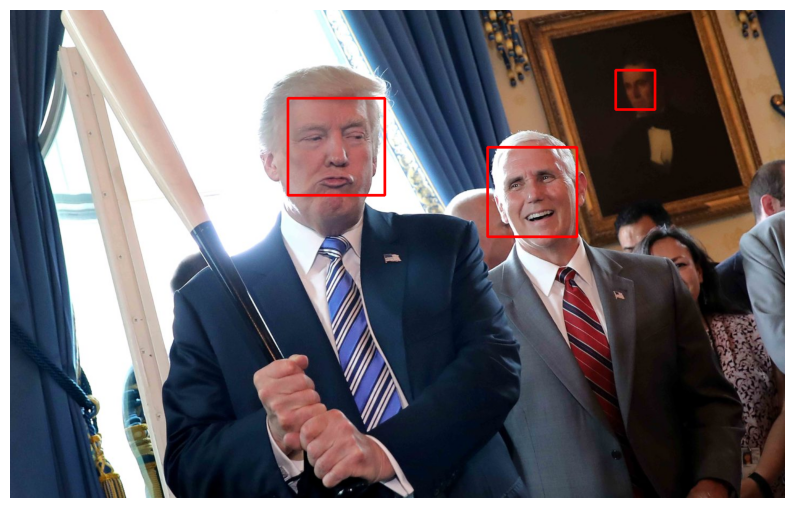

In [30]:
# TODO: display the image with bounding boxes around faces
# Loop over each found face
def img_rectangles(img):
    for (x, y, w, h) in faces: 
        # Draw a box around the faces
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
    # Display the result
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()

img_rectangles(img)

How do you feel? Is it working well?

If not, you have some hyperparameters in the method `detectMultiScale`, specifically:
- scaleFactor: bigger scale factor will make your algorithm go faster, with less accuracy. A value between 1 and 1.3 is usual.
- minNeighbors: how many neighbors each candidate box should have to retain it. High values mean better accuracy, but less detections. A value around 5 might be a good option.
- minSize: the minimun size of a box, e.g. (30,30) for a square of 30 pixels side
- maxSize: maximum size of a box

Play with those hyperparameters to get a better result.

[[1125  113   73   73]
 [ 516  165  180  180]
 [ 887  256  166  166]]


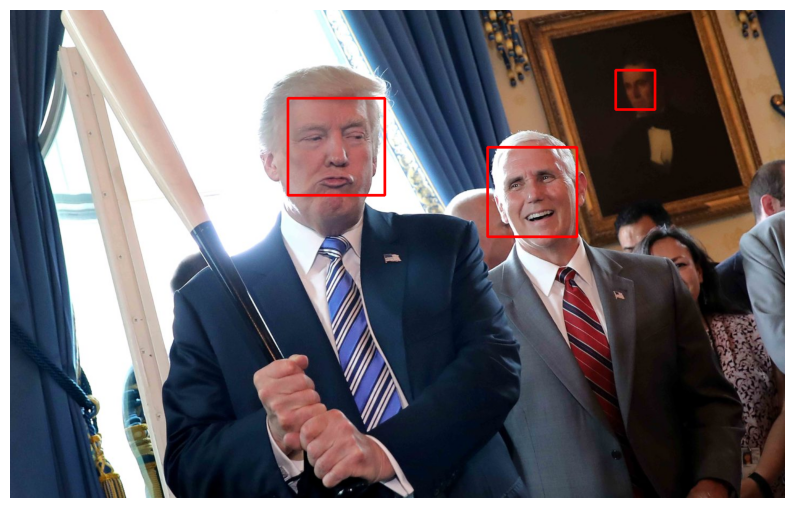

In [32]:
# TODO: Play with hyperparameters to get a better result
img = plt.imread('Trump-baseball.jpg')
faces = face_cascade.detectMultiScale(img, minNeighbors=3, minSize=(25,25))
print(faces) ## 3 rectangles

img_rectangles(img)

**Optional**: Detect your face on your webcam!

To do so, you can use the `VideoCapture` of openCV. More specifically, you have to do the following:
```Python
video_capture = cv2.VideoCapture(0)
```

This will instantiate an object that will allow you to get your camera input.

Then, in a `while` loop, you can just do:
```Python
ret, frame = video_capture.read()
```

The variable `frame` will contain then an image as a numpy array (just like using `plt.imread`). You can then do the face detection and display the result.

Do not forget to put a break into your `while` loop.
For example, if you use the following code, your video will stop when you press the `Q` keyboard.
```Python
if cv2.waitKey(1) & 0xFF == ord('q'):
    break
```



In [ ]:
# TODO: use face detection on your webcam

If you want even more, be aware that you can detect the eyes and the mouth using the same method. All you have to do is use the right XML file when instantiating your `CascadeClassifier`.